In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_absolute_percentage_error

In [100]:
Data = pd.read_csv("Chamodi akka1.csv")

In [2]:
Data = pd.read_excel('Dataset3.xlsx')

In [3]:
Data.columns

Index(['Charge_type', 'Charge_size', 'Standoff_distance', 'Incident_pressure'], dtype='object')

In [102]:
Data

,Charged_type,Charge_type,Charge_size,Standoff_distance,Incident_pressure
0,TNT,1,0.5,1.5,283.258
1,TNT,1,0.5,2.5,163.904
2,TNT,1,0.5,3.5,135.678
3,TNT,1,0.5,4.5,124.039
4,TNT,1,0.5,5.5,117.856
...,...,...,...,...,...
541,CompB,0,25.0,16.0,126.505
542,CompB,0,25.0,17.0,124.160
543,CompB,0,25.0,18.0,122.164
544,CompB,0,25.0,19.0,120.450


In [4]:
X=Data.loc[:,['Charge_type', 'Charge_size', 'Standoff_distance']]
y=Data.loc[:,['Incident_pressure']]

###Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
df_v = X.copy()
df_v

,Charge_type,Charge_size,Standoff_distance
0,TNT,0.5,1.5
1,TNT,0.5,2.5
2,TNT,0.5,3.5
3,TNT,0.5,4.5
4,TNT,0.5,5.5
...,...,...,...
541,CompB,25.0,16.0
542,CompB,25.0,17.0
543,CompB,25.0,18.0
544,CompB,25.0,19.0


In [8]:
df_v1 = X.copy().reset_index()
df_v1

,index,Charge_type,Charge_size,Standoff_distance
0,0,TNT,0.5,1.5
1,1,TNT,0.5,2.5
2,2,TNT,0.5,3.5
3,3,TNT,0.5,4.5
4,4,TNT,0.5,5.5
...,...,...,...,...
541,541,CompB,25.0,16.0
542,542,CompB,25.0,17.0
543,543,CompB,25.0,18.0
544,544,CompB,25.0,19.0


In [10]:
df_v3 = X.copy().reset_index().drop('index',axis=1)
df_v3

,Charge_type,Charge_size,Standoff_distance
0,TNT,0.5,1.5
1,TNT,0.5,2.5
2,TNT,0.5,3.5
3,TNT,0.5,4.5
4,TNT,0.5,5.5
...,...,...,...
541,CompB,25.0,16.0
542,CompB,25.0,17.0
543,CompB,25.0,18.0
544,CompB,25.0,19.0


<AxesSubplot:>

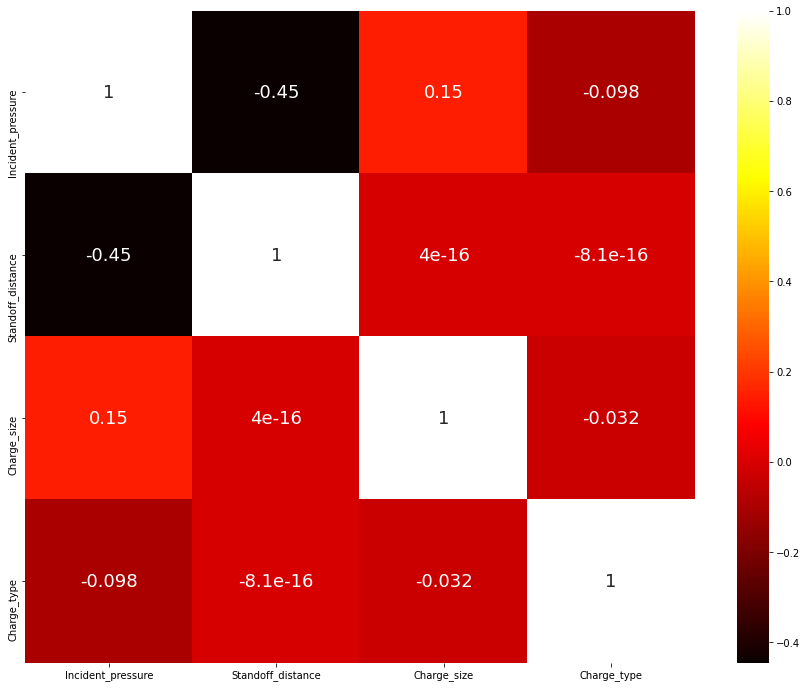

In [12]:
import seaborn as sn
from pandas import DataFrame

t=['Charge_type', 'Charge_size', 'Standoff_distance','Incident_pressure']

s=abs(Data[t].corr()['Incident_pressure'])
p=s.sort_values(ascending=True)
p.index

t=p.index[::-1]
df = pd.DataFrame(Data[t],columns=t)
fig, ax = plt.subplots(figsize=(15,12),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, cmap="hot", annot=True,annot_kws={"size": 18},ax=ax)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Training Score 0.9932977692077002
Testing Score 0.9830486634437398
Testing mean_squared_error 12880.022109111953
Testing mean_absolute_error 37.32339795740639
FB testing Incident_pressure   -0.027942
dtype: float64
FB training Incident_pressure   -0.046062
dtype: float64


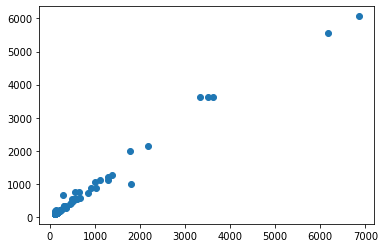

In [59]:
#########       MODEL 01 ............................................
#==================================================================================
#                                  XGBRegressor 
#==================================================================================
import xgboost as xgb

XGB_Reg = xgb.XGBRegressor(n_estimators=10, max_depth=4, gamma=0.0001)
XGB_Reg.fit(X_train, y_train)
print("Training Score",XGB_Reg.score(X_train, y_train))
print("Testing Score",XGB_Reg.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, XGB_Reg.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, XGB_Reg.predict(X_test)))

p_1=XGB_Reg.predict(X_test).mean()
p_2=XGB_Reg.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))    ##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))
plt.scatter(y_test,XGB_Reg.predict(X_test))

Data["XGBoost Regressor"] = XGB_Reg.predict(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


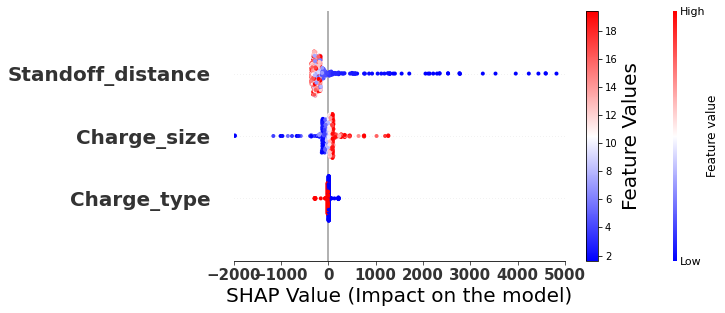

<Figure size 432x288 with 0 Axes>

In [71]:
import shap
 ####(Global explanation)

fig = plt.figure()


explainer = shap.TreeExplainer(XGB_Reg)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, show=False,cmap = "bwr")
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.xlim([-2000,5000])
cb = plt.colorbar()
cb.set_label("Feature Values",fontsize = 20)

plt.show()
plt.savefig('SHAP.png', dpi = 600, bbox_inches = 'tight')



#We can edit this figure feature value scale numbers using paint akkaa

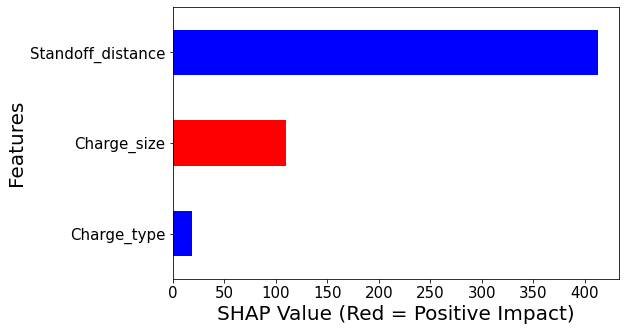

In [74]:
#avarage impact  (Global explanation)


def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(8,5),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)", fontsize=20)
    ax.set_ylabel("Features", fontsize=20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
ABS_SHAP(shap_values,X)

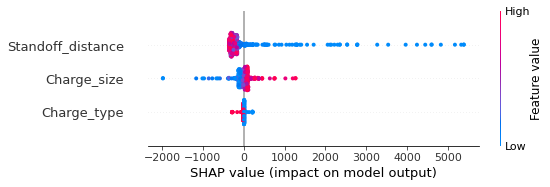

In [72]:
#Just keep this code: 
import shap
explainer = shap.TreeExplainer(XGB_Reg)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



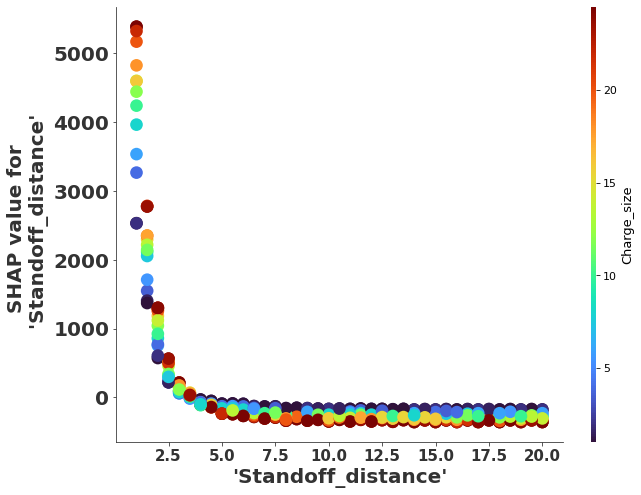

In [73]:
#SHAP dependence plot

shap.dependence_plot('Standoff_distance',shap_values,X,show=False,cmap=plt.get_cmap("turbo"),dot_size=160)


plt.ylabel("SHAP value for \n 'Standoff_distance'", fontsize = 20,weight='bold')
plt.xlabel("'Standoff_distance'",fontsize = 20,weight='bold')

plt.gcf().set_size_inches(10,8)

plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')


plt.show()



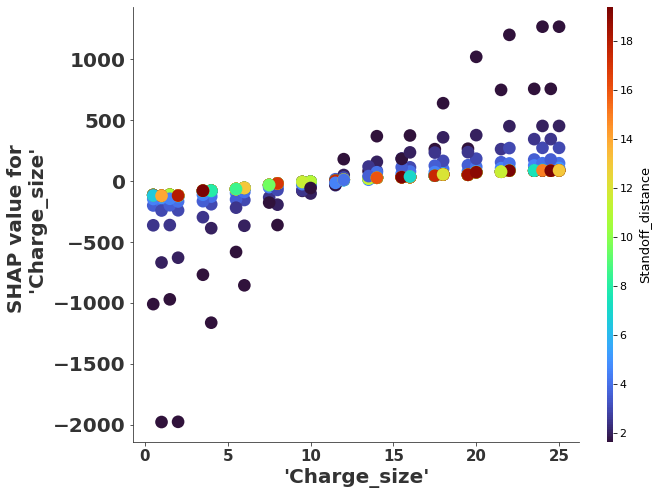

In [75]:

shap.dependence_plot('Charge_size',shap_values,X,show=False,cmap=plt.get_cmap("turbo"),dot_size=160)


plt.ylabel("SHAP value for \n 'Charge_size'", fontsize = 20,weight='bold')
plt.xlabel("'Charge_size'",fontsize = 20,weight='bold')

plt.gcf().set_size_inches(10,8)

plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')


plt.show()

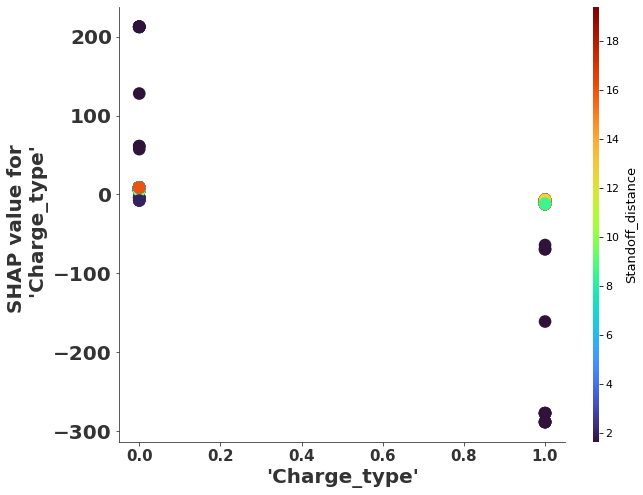

In [76]:

shap.dependence_plot('Charge_type',shap_values,X,show=False,cmap=plt.get_cmap("turbo"),dot_size=160)


plt.ylabel("SHAP value for \n 'Charge_type'", fontsize = 20,weight='bold')
plt.xlabel("'Charge_type'",fontsize = 20,weight='bold')

plt.gcf().set_size_inches(10,8)

plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')


plt.show()

In [84]:
#SHAP local explanation

Data_point=181
shap.initjs()
explainer = shap.Explainer(XGB_Reg)
shap_values = explainer(X)
shap.force_plot(shap_values[Data_point])

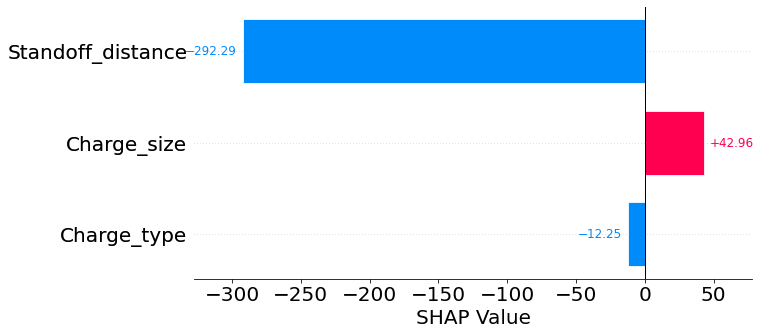

In [85]:
#SAMe figure akkiiii just like above bar plot

shap.plots.bar(shap_values[Data_point],show=False)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([-0.75,1.25])
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value", fontsize=20)

plt.show()

In [64]:
# LIME

import lime
import lime.lime_tabular
Model_variables=['Charge_type', 'Charge_size', 'Standoff_distance']

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X),
                    feature_names=Model_variables, 
                    class_names=y, 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

Intercept 374.19925059979516
Prediction_local [142.06547015]
Right: 129.44353


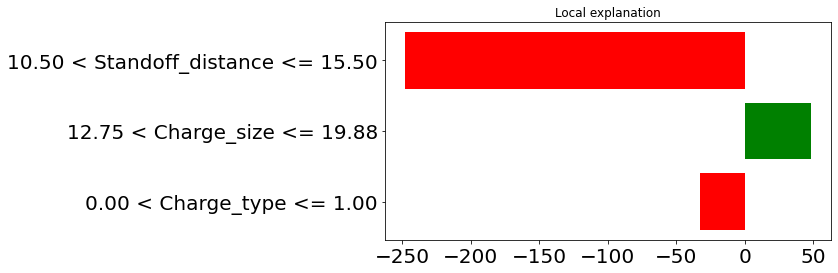

In [70]:
exp = explainer.explain_instance(X.iloc[181],XGB_Reg.predict)
exp.as_pyplot_figure()
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([-1,1.25])
plt.gcf().set_size_inches(8,4)


plt.show()

Training Score 0.953781711184554
Testing Score 0.9268060346830712
Testing mean_squared_error 55614.48729465869
Testing mean_absolute_error 112.22949922391902
FB testing Incident_pressure   -0.015563
dtype: float64
FB training Incident_pressure   -1.388248e-16
dtype: float64


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


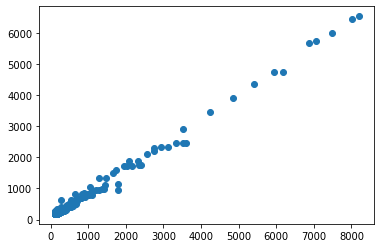

In [22]:
#########       MODEL 02 ............................................
#==================================================================================
#                                  GradientBoostingRegressor 
#==================================================================================
from sklearn.ensemble import GradientBoostingRegressor

GBreg = GradientBoostingRegressor(random_state=0,n_estimators=15,max_depth=4)
GBreg.fit(X_train, y_train)
print("Training Score",GBreg.score(X_train, y_train))
print("Testing Score",GBreg.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, GBreg.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, GBreg.predict(X_test)))

p_1=GBreg.predict(X_test).mean()
p_2=GBreg.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))   ##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))
plt.scatter(y,GBreg.predict(X))

Data["GradientBoosting Regressor"] = GBreg.predict(X)

Training Score 0.9900871309279844
Testing Score 0.9553494360400869
Testing mean_squared_error 33926.54314185104
Testing mean_absolute_error 80.94176488876977
FB testing Incident_pressure   -0.077692
dtype: float64
FB training Incident_pressure    0.0
dtype: float64


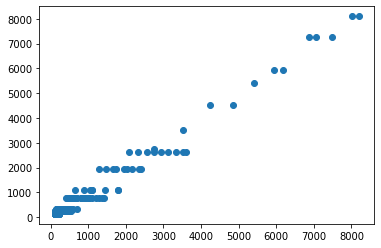

In [86]:
#########       MODEL 03 ............................................
#==================================================================================
#                              Decission Tree Regressor
#==================================================================================
from sklearn import tree

Decission_Tree_reg = tree.DecisionTreeRegressor(max_depth=4,min_samples_split=2)
Decission_Tree_reg.fit(X_train, y_train)
print("Training Score",Decission_Tree_reg.score(X_train, y_train))
print("Testing Score",Decission_Tree_reg.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, Decission_Tree_reg.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, Decission_Tree_reg.predict(X_test)))

p_1=Decission_Tree_reg.predict(X_test).mean()
p_2=Decission_Tree_reg.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))   ##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))
plt.scatter(y,Decission_Tree_reg.predict(X))

Data["Decission_Tree_reg"] = Decission_Tree_reg.predict(X)

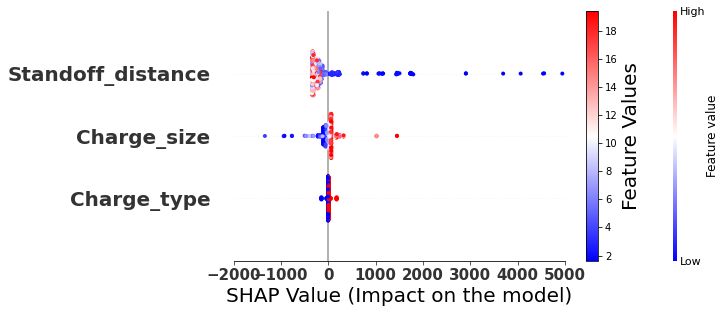

<Figure size 432x288 with 0 Axes>

In [87]:
import shap
 ####(Global explanation)

fig = plt.figure()


explainer = shap.TreeExplainer(Decission_Tree_reg)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, show=False,cmap = "bwr")
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.xlim([-2000,5000])
cb = plt.colorbar()
cb.set_label("Feature Values",fontsize = 20)

plt.show()
plt.savefig('SHAP.png', dpi = 600, bbox_inches = 'tight')



#We can edit this figure feature value scale numbers using paint akkaa

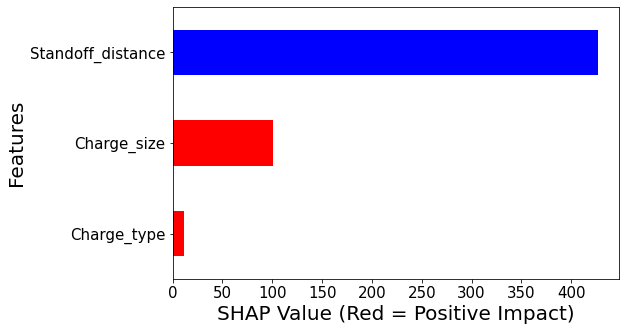

In [88]:
#avarage impact  (Global explanation)


def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(8,5),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)", fontsize=20)
    ax.set_ylabel("Features", fontsize=20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
ABS_SHAP(shap_values,X)

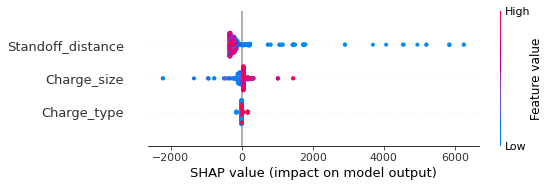

In [89]:
#Just keep this code: 
import shap
explainer = shap.TreeExplainer(Decission_Tree_reg)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



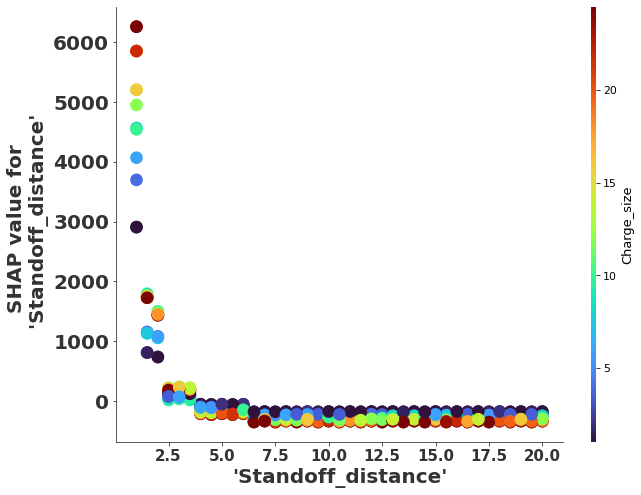

In [90]:
#SHAP dependence plot

shap.dependence_plot('Standoff_distance',shap_values,X,show=False,cmap=plt.get_cmap("turbo"),dot_size=160)


plt.ylabel("SHAP value for \n 'Standoff_distance'", fontsize = 20,weight='bold')
plt.xlabel("'Standoff_distance'",fontsize = 20,weight='bold')

plt.gcf().set_size_inches(10,8)

plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')


plt.show()



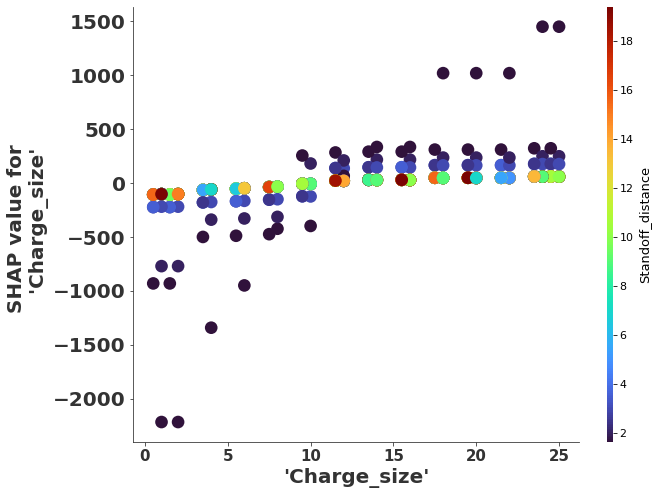

In [91]:

shap.dependence_plot('Charge_size',shap_values,X,show=False,cmap=plt.get_cmap("turbo"),dot_size=160)


plt.ylabel("SHAP value for \n 'Charge_size'", fontsize = 20,weight='bold')
plt.xlabel("'Charge_size'",fontsize = 20,weight='bold')

plt.gcf().set_size_inches(10,8)

plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')


plt.show()

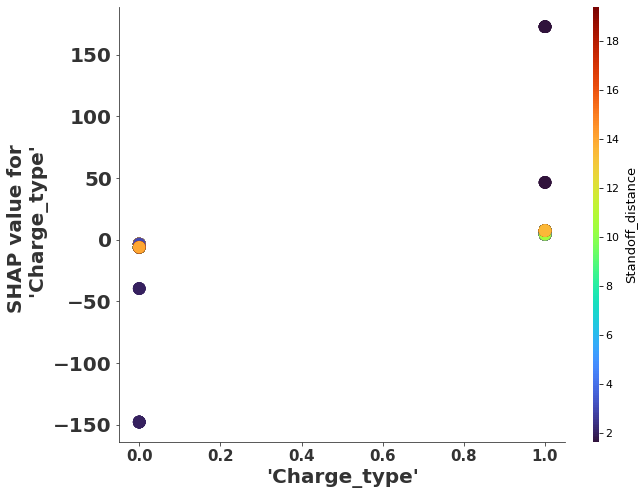

In [92]:

shap.dependence_plot('Charge_type',shap_values,X,show=False,cmap=plt.get_cmap("turbo"),dot_size=160)


plt.ylabel("SHAP value for \n 'Charge_type'", fontsize = 20,weight='bold')
plt.xlabel("'Charge_type'",fontsize = 20,weight='bold')

plt.gcf().set_size_inches(10,8)

plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 15,weight='bold')


plt.show()

In [93]:
#SHAP local explanation

Data_point=181
shap.initjs()
explainer = shap.Explainer(Decission_Tree_reg)
shap_values = explainer(X)
shap.force_plot(shap_values[Data_point])

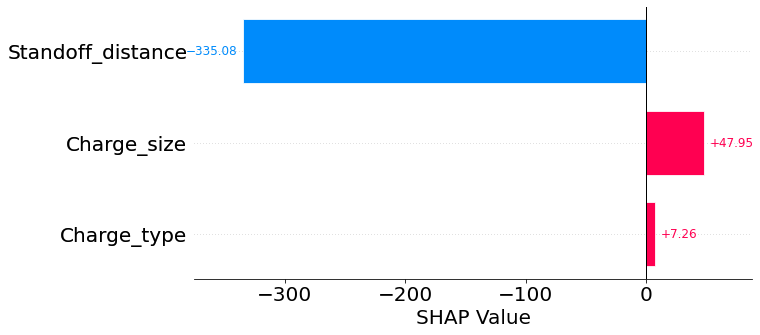

In [94]:
#SAMe figure akkiiii just like above bar plot

shap.plots.bar(shap_values[Data_point],show=False)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([-0.75,1.25])
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value", fontsize=20)

plt.show()

In [95]:
# LIME

import lime
import lime.lime_tabular
Model_variables=['Charge_type', 'Charge_size', 'Standoff_distance']

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X),
                    feature_names=Model_variables, 
                    class_names=y, 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

Intercept 347.38335291948977
Prediction_local [194.38581061]
Right: 129.59158888888888


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


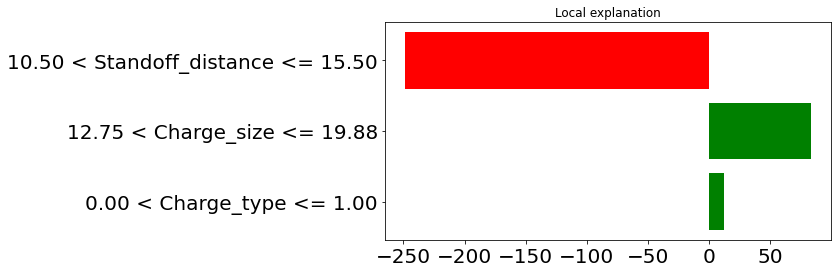

In [96]:
exp = explainer.explain_instance(X.iloc[181],Decission_Tree_reg.predict)
exp.as_pyplot_figure()
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([-1,1.25])
plt.gcf().set_size_inches(8,4)


plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training Score 0.9843116104350924
Testing Score 0.9414634383505026
Testing mean_squared_error 44477.44906335919
Testing mean_absolute_error 93.9280519883501
FB testing Incident_pressure   -0.039025
dtype: float64
FB training Incident_pressure   -0.003282
dtype: float64


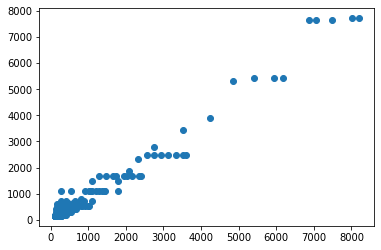

In [23]:
#########       MODEL 04 ............................................
#==================================================================================
#                                  AdaBoostRegressor  (Base model is decision tree)
#==================================================================================


from sklearn.ensemble import AdaBoostRegressor

adregr = AdaBoostRegressor(random_state=0, n_estimators=100)
adregr.fit(X_train, y_train)

adregr.fit(X_train, y_train)
print("Training Score",adregr.score(X_train, y_train))
print("Testing Score",adregr.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, adregr.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, adregr.predict(X_test)))

p_1=adregr.predict(X_test).mean()
p_2=adregr.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))
plt.scatter(y,adregr.predict(X))

Data["AdaBoostRegressor"] = adregr.predict(X)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Score 0.9966896159018492
Testing Score 0.9900861338346424
Testing mean_squared_error 7532.7874573657555
Testing mean_absolute_error 36.19715154153388
FB testing Incident_pressure   -0.005154
dtype: float64
FB training Incident_pressure   -0.013253
dtype: float64


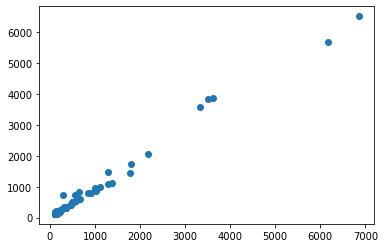

In [24]:
#########       MODEL 05 ............................................
from sklearn.ensemble import RandomForestRegressor

RFregr = RandomForestRegressor(max_depth=5, random_state=0)
RFregr.fit(X_train, y_train)

print("Training Score",RFregr.score(X_train, y_train))
print("Testing Score",RFregr.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, RFregr.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, RFregr.predict(X_test)))

p_1=RFregr.predict(X_test).mean()
p_2=RFregr.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))    ##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))
plt.scatter(y_test,RFregr.predict(X_test))

Data["RandomForestRegressor"] = RFregr.predict(X)

In [25]:
Data.to_csv("Total predictions.csv")

In [26]:
x_test = X_test.copy()

In [27]:
X_test ["XGB_Reg"] = XGB_Reg.predict(x_test)
X_test ["Gradineboosting Reg"] = GBreg.predict(x_test)
X_test ["Adaboost"] = adregr.predict(x_test)
X_test ["Decission_Tree_reg"] = Decission_Tree_reg.predict(x_test)
X_test ["RandomForest"] = RFregr.predict(x_test)

X_test.to_csv("Test_predictions.csv")

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [28]:
x_train = X_train.copy()

In [29]:
X_train ["XGB_Reg"] = XGB_Reg.predict(x_train)
X_train ["Gradineboosting Reg"] = GBreg.predict(x_train)
X_train ["Adaboost"] = adregr.predict(x_train)
X_train ["Decission_Tree_reg"] = Decission_Tree_reg.predict(x_train)
X_train ["RandomForest"] = RFregr.predict(x_train)

X_train.to_csv("Train_predictions.csv")

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [ ]:
### PLots akke keep this part in the bottom 

In [51]:
X=Data.loc[:,['Charge_type', 'Charge_size', 'Standoff_distance']]
y=Data.loc[:,['Incident_pressure']]
###Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
#########       MODEL 01 ............................................
#==================================================================================
#                                  XGBRegressor 
#==================================================================================
import xgboost as xgb

XGB_Reg = xgb.XGBRegressor(n_estimators=10, max_depth=4, gamma=0.0001)
XGB_Reg.fit(X_train, y_train)
print("Training Score",XGB_Reg.score(X_train, y_train))
print("Testing Score",XGB_Reg.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, XGB_Reg.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, XGB_Reg.predict(X_test)))

p_1=XGB_Reg.predict(X_test).mean()
p_2=XGB_Reg.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))    ##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))

Training Score 0.9932977692077002
Testing Score 0.9830486634437398
Testing mean_squared_error 12880.022109111953
Testing mean_absolute_error 37.32339795740639
FB testing Incident_pressure   -0.027942
dtype: float64
FB training Incident_pressure   -0.046062
dtype: float64


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


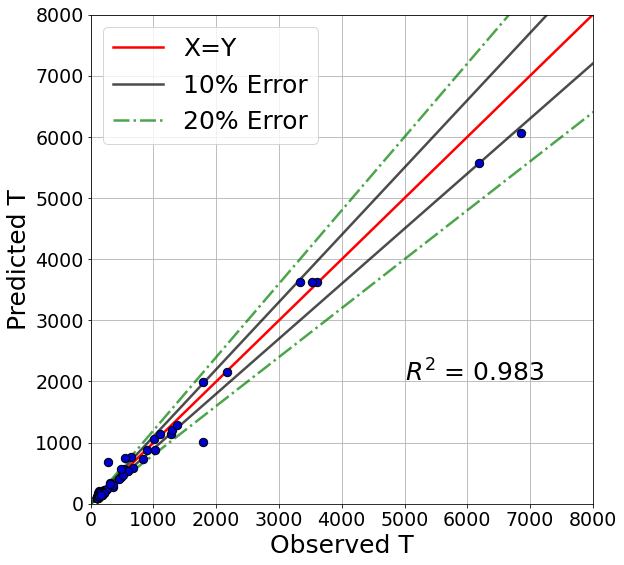

In [53]:
# Generate data

from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


y = XGB_Reg.predict(X_test)          # Model on prvious line is called here
x = y_test



# Add scatterplot
ax.scatter(x, y, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 5)



plt.ylabel('Predicted T',fontsize = 25)
plt.xlabel('Observed T',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,9000)

plt.plot(x1, x1, 'Red', label='X=Y',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, 'Black', label='10% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'Black', linestyle='-',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='20% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0,8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, XGB_Reg.predict(X_test))), (5000, 2000),fontsize = 25)  #Model is called here

plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [54]:
#akke tava model ekaka plot eka one nam pallaha wagema line 3ma copy kara kara ganna.. 
#Mokada man X Y call karana nisa mehemma ayet model ekak call karot waradiii

In [55]:
X=Data.loc[:,['Charge_type', 'Charge_size', 'Standoff_distance']]
y=Data.loc[:,['Incident_pressure']]
###Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
#########       MODEL 03 ............................................
#==================================================================================
#                              Decission Tree Regressor
#==================================================================================
from sklearn import tree

Decission_Tree_reg = tree.DecisionTreeRegressor(max_depth=4,min_samples_split=2)
Decission_Tree_reg.fit(X_train, y_train)
print("Training Score",Decission_Tree_reg.score(X_train, y_train))
print("Testing Score",Decission_Tree_reg.score(X_test, y_test))
print("Testing mean_squared_error",mean_squared_error(y_test, Decission_Tree_reg.predict(X_test)))
print("Testing mean_absolute_error",mean_absolute_error(y_test, Decission_Tree_reg.predict(X_test)))

p_1=Decission_Tree_reg.predict(X_test).mean()
p_2=Decission_Tree_reg.predict(X_train).mean()
o_1=y_test.mean()
o_2=y_train.mean()
print("FB testing",2*(p_1-o_1)/(p_1+o_1))   ##### FB means fractional bias
print("FB training",2*(p_2-o_2)/(p_2+o_2))

Training Score 0.9900871309279844
Testing Score 0.9553494360400869
Testing mean_squared_error 33926.54314185104
Testing mean_absolute_error 80.94176488876978
FB testing Incident_pressure   -0.077692
dtype: float64
FB training Incident_pressure    0.0
dtype: float64


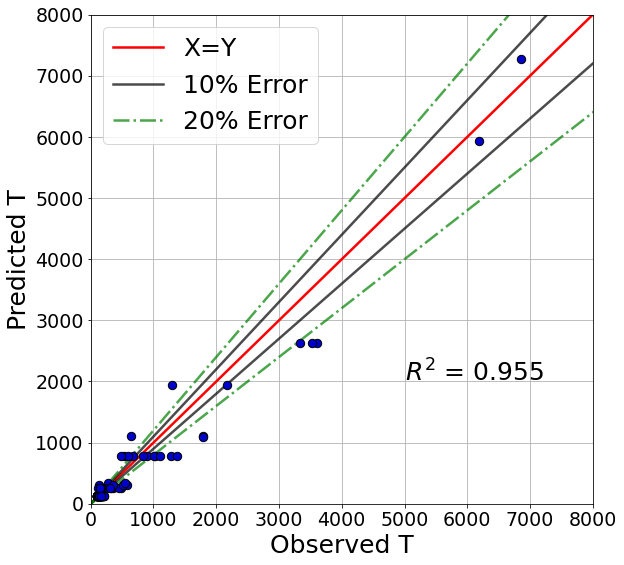

In [57]:
# Generate data

from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


y = Decission_Tree_reg.predict(X_test)          # Model on prvious line is called here
x = y_test



# Add scatterplot
ax.scatter(x, y, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 5)



plt.ylabel('Predicted T',fontsize = 25)
plt.xlabel('Observed T',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,9000)

plt.plot(x1, x1, 'Red', label='X=Y',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, 'Black', label='10% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'Black', linestyle='-',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='20% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0,8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, Decission_Tree_reg.predict(X_test))), (5000, 2000),fontsize = 25)  #Model is called here

plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')